In [1]:
from src.utils.data_utils import *
from src.utils.plot_utils import *
from src.utils.general_utils import *
from src.utils.train_utils import *
from src.data.some_dataloader import RedditDataset
import networkx as nx
import pandas as pd

In [2]:
dataset = RedditDataset()
data = dataset.data
body = dataset.data_body
title = dataset.data_title

## A first glance at the data
Here we start by plotting some general statistics about the reddit dataset.
 - The distribution of the number of appareances of each subreddit as source/target. A log-log plot as it is heavy tailed. We have globally more source subreddits than target subreddits. Most subreddits appear only a few time in the dataset, some outliers.
 - The Most negative subreddits
 - The Most positive subreddits

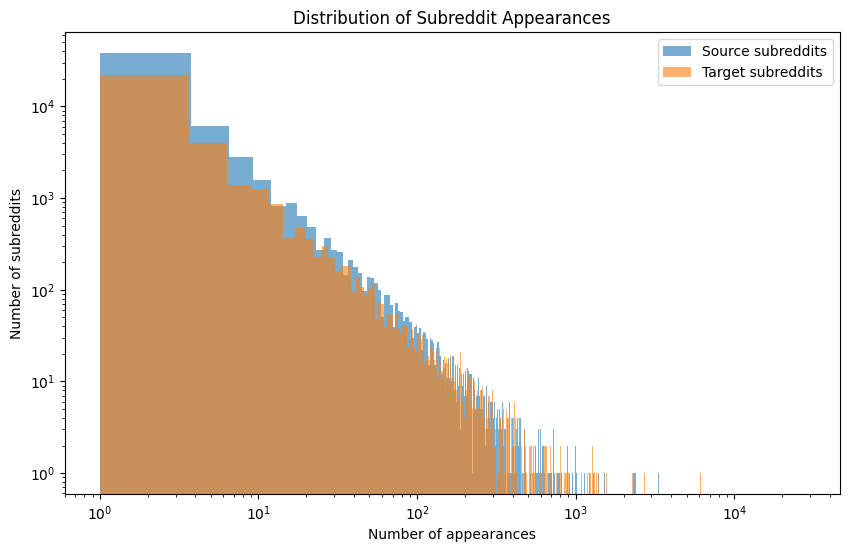

In [7]:
plot_distribution_nb_appearance_subreddits(data)

Using 272 subreddits (>400 posts)


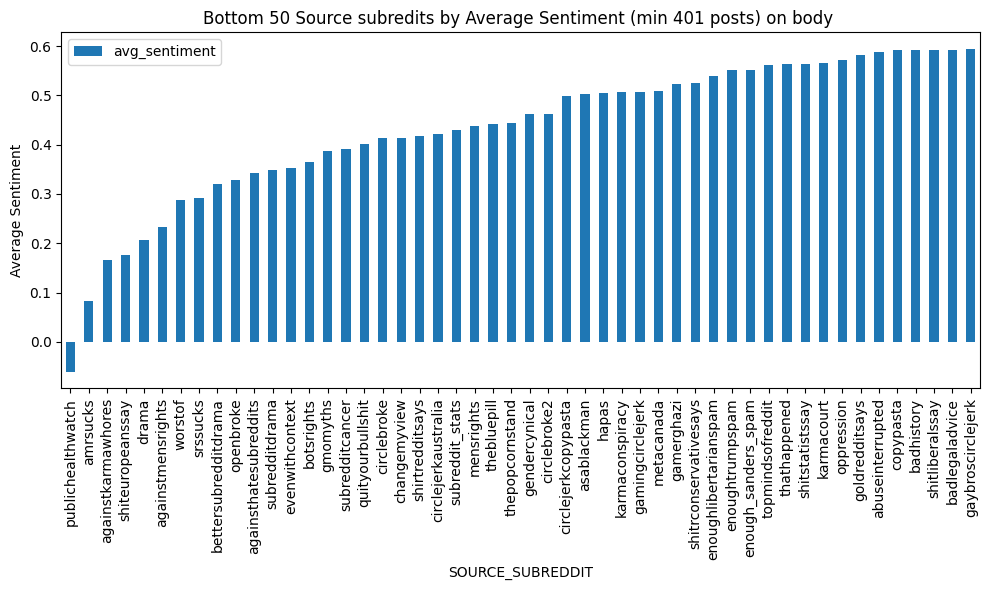

Using 272 subreddits (>400 posts)


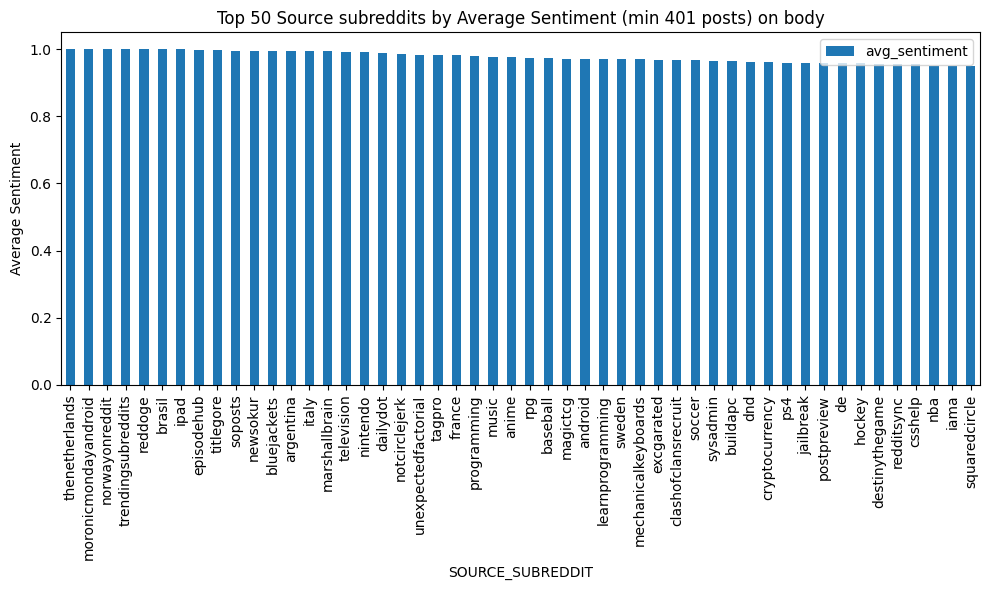

In [8]:
plot_sorted_subreddits(
    get_sorted_subreddits_by_avg_sentiment(data, 'SOURCE_SUBREDDIT',min_count=400, ascending=True),
    50,
    'SOURCE_SUBREDDIT',
    'Bottom 50 Source subredits by Average Sentiment (min 401 posts) on body '
    )

plot_sorted_subreddits(
    get_sorted_subreddits_by_avg_sentiment(data, 'SOURCE_SUBREDDIT',min_count=400 ,ascending=False),
    50,
    'SOURCE_SUBREDDIT',
    'Top 50 Source subreddits by Average Sentiment (min 401 posts) on body'
    )

## 1.0 Global Time analysis
To investigate our first idea of seeking changing trends towards/against negativity on reddit. 
 - Average Link sentiment per month on 3 years

/Users/katiahaefliger/Desktop/EPFL/MA 1/ADA/Project/ada-2025-project-othertagada/src/utils/plot_utils.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_month'] = data['TIMESTAMP'].dt.to_period('M').astype(str)


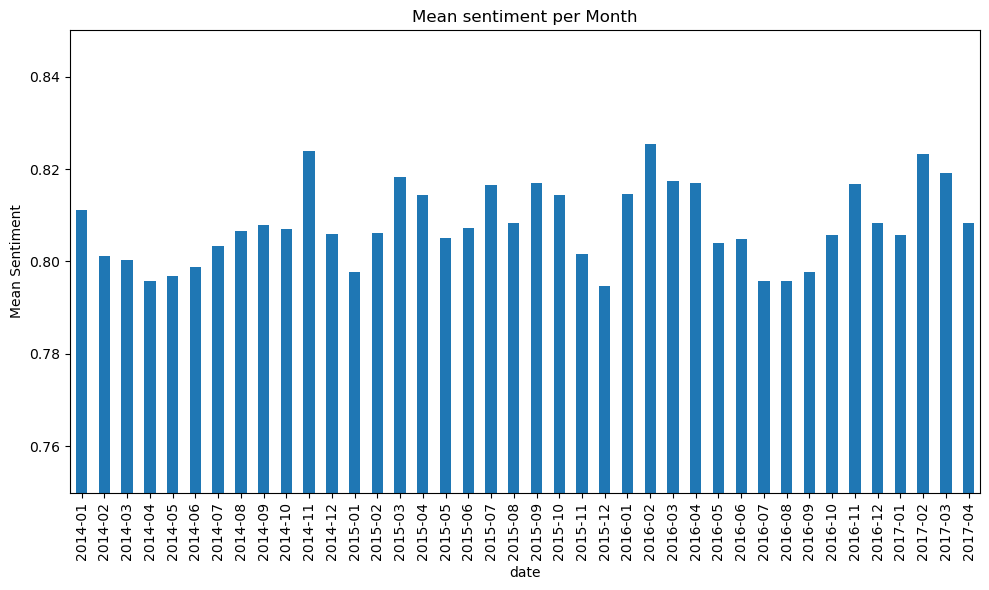

In [6]:
plot_mean_sentiment_per_month(data)

### 1.1 Logistic regression
A logistic regression model to classify link sentiment over a time window was implemented. This can be a helpful tool to observe a change in importance in a certain properties over time by training models over different time period. 
Here it is demonstrated for a training using the following properties :
 * 5 : Fraction of uppercase characters
 * 10 : Number of long words (at least 6 characters)
 * 15 :  Number of long sentences (at least 10 words)
 * 20 :  Negative sentiment calculated by VADER

In [10]:
properties_test = [5, 10, 15, 20] # properties we want the logistic regression to be trained on, this is just an example
path_test = 'src/models/properties_logitreg_test.pkl' 
train_logit_link_sentiment_timewindow(data, properties_test, path_test, '2016-01-01', '2017-01-01') # over 2016

Model saved to src/models/properties_logitreg_test.pkl
                           Logit Regression Results                           
Dep. Variable:         LINK_SENTIMENT   No. Observations:                  541
Model:                          Logit   Df Residuals:                      536
Method:                           MLE   Df Model:                            4
Date:                Wed, 05 Nov 2025   Pseudo R-squ.:                 0.01513
Time:                        17:26:02   Log-Likelihood:                -125.07
converged:                       True   LL-Null:                       -126.99
Covariance Type:            nonrobust   LLR p-value:                    0.4276
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5996      0.305      8.512      0.000       2.001       3.198
prop_5         0.1003      2.094      0.048      0.962      -4.003       4.2

### 1.2 Weekly and hourly trends
Looking into the relationship between time of posting and negativity of the interaction. We might think that Mondays are the most negative days but it is in fact Saturdays (too much time in one's hands...).

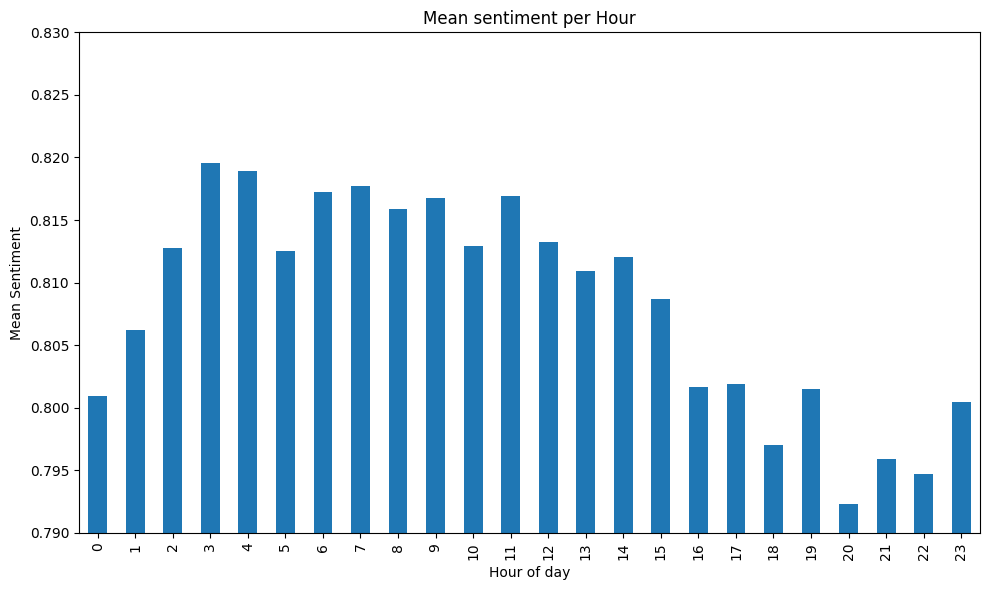

In [11]:
# Sentiment by hour of day

data['hour'] = data['TIMESTAMP'].dt.hour
sentiment_by_hour = data.groupby('hour')['LINK_SENTIMENT'].mean()

plot_bar_chart(sentiment_by_hour, 
               title='Mean sentiment per Hour', 
               xlabel='Hour of day', 
               ylabel='Mean Sentiment', 
               ylim=(0.79, 0.83)
              )

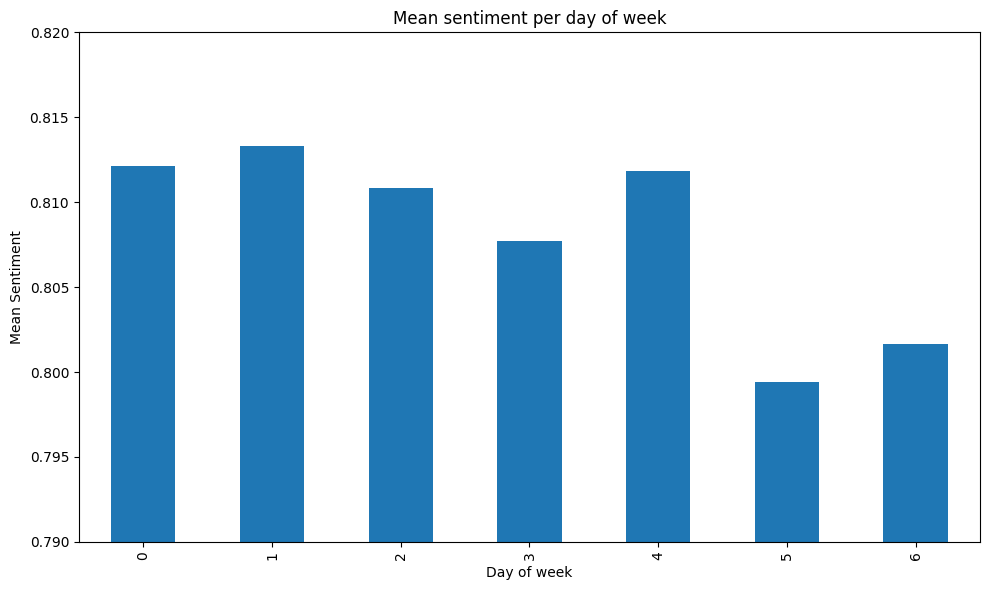

In [12]:
# Sentiment by day of week

data['day_of_week'] = data['TIMESTAMP'].dt.day_of_week
sentiment_by_hour = data.groupby('day_of_week')['LINK_SENTIMENT'].mean()

plot_bar_chart(sentiment_by_hour, 
               title='Mean sentiment per day of week', 
               xlabel='Day of week', 
               ylabel='Mean Sentiment', 
               ylim=(0.79, 0.82)
              )

By looking at these results, we can clearly see that the mean sentiments follows hourly and weekly trends that should be explored further.

# 2. Reddit as a graph structure
Loking into the feasability of our second idea. 

html spring graph of 2 most negative outgoing subreddits

In [3]:
write_html_spring_graph_n_nodes(body, get_sorted_subreddits_by_avg_sentiment(body, direction='SOURCE_SUBREDDIT',min_count=400, ascending=True), 2)

Using 71 subreddits (>400 posts)


### 2.1 KMeans Cluster
Cluster of (the 200 most active) subreddits by their graph-based structural features :
* degree (total, in and out)
* clustering
* pagerank
* betweeness 
* closeness

and plot of the average sentiment of each cluster and computation of the variance of the mean sentiment within each cluster to determine if there is a correlation between the structural features of a node and its (outgoing) negativity.

Top 200 subreddits by graph core density:
['askreddit', 'todayilearned', 'creepy', 'writingprompts', 'iama', 'pics', 'documentaries', 'newsokur', 'movies', 'leagueoflegends', 'australia', 'facepalm', 'photoshopbattles', 'kotakuinaction', 'interestingasfuck', 'videos', 'explainlikeimfive', 'dataisbeautiful', 'nostupidquestions', 'shittyaskscience', 'wtf', 'bestof', 'pcmasterrace', 'help', 'hockey', 'hearthstone', 'dota2', 'canada', 'cringe', 'science', 'television', 'wow', 'bugs', 'gaming', 'atheism', 'undelete', 'adviceanimals', 'newzealand', 'showerthoughts', 'subredditdrama', 'worldnews', 'diy', 'history', 'oldschoolcool', 'anime', 'casualconversation', 'fitness', 'funny', 'mildlyinfuriating', 'offmychest', 'rickandmorty', 'titlegore', 'truereddit', 'india', 'bitcoin', 'changemyview', 'conspiracy', 'europe', 'european', 'politics', 'space', 'toronto', 'trees', 'worldpolitics', 'casualiama', 'dogecoin', 'soccer', 'globaloffensive', 'personalfinance', '2007scape', '4chan', 'aww', 'circ

c:\Users\Matteo\Documents\GitHub\ada-2025-project-othertagada\src\utils\plot_utils.py:114: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


c:\Users\Matteo\Documents\GitHub\ada-2025-project-othertagada\src\utils\plot_utils.py:114: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




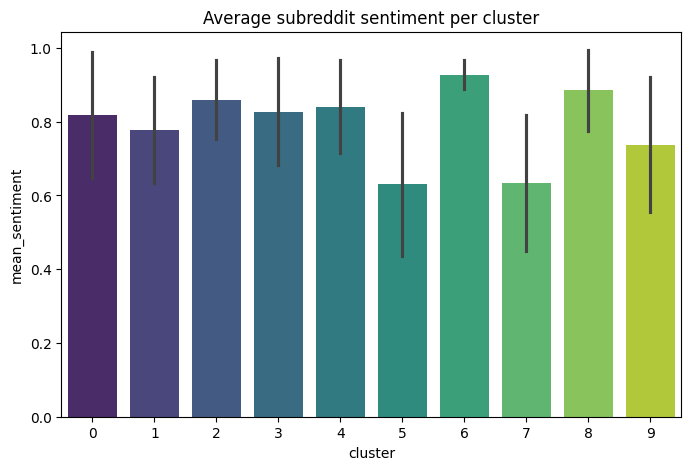

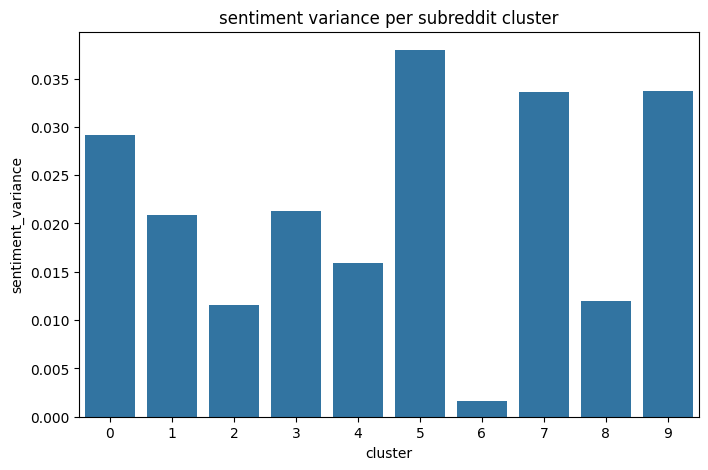

In [ ]:
# Build graph with the most interactive subreddits and extract their graph-based features
nb_active_subreddits = 200
G = compute_core_subgraph(data, nb_active_subreddits)
features = extract_graph_features(G)

# Train a Kmeans model to cluster the subreddits by their features and computing the sentiment variance within the cluters
n_clusters = 10
features, kmeans_model = kmeans_cluster_graph_features(features, n_clusters)
features, cluster_variance = mean_sentiment_per_subreddit_in_graph(G, data, features)

# Plot the mean sentiment of each cluster and its variance
plot_average_sentiment_per_cluster(features)
plot_cluster_sentiment_variance(cluster_variance)

Find the n nodes that are the most central to the network and the interactions between them

Top 10 subreddits by graph core density:
['askreddit', 'todayilearned', 'creepy', 'writingprompts', 'iama', 'pics', 'documentaries', 'newsokur', 'movies', 'leagueoflegends']
Nodes: 10, Edges: 60


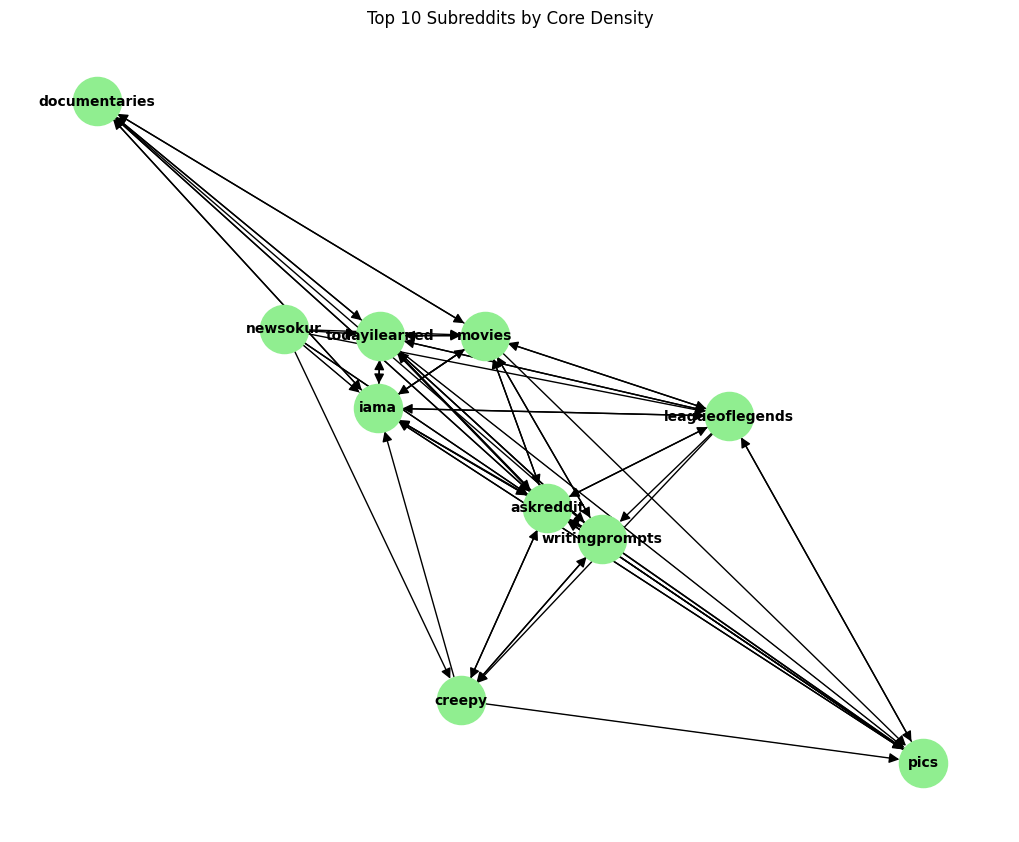

In [3]:
# Set the family : core subreddits (perhaps not a wise choice but ok for demo)
n_core = 10
G_core = compute_core_subgraph(data, k=n_core)

# Plot family graph with all interactions
plot_subreddit_graph(G_core, title=f"Top {n_core} Subreddits by Core Density")

Animation of the interactions within the group, week per week, during 2015

As we can see, the choice of population is not that wise as these subreddits, although heavily connected, are interacting due to their nature of "link sharers" and not because of real communication. We thus should redefine our criterias to find a suitable group to investigate.
We should also be aware (as mentioned in the readme) to chose a good timeframe in order to see the events unfold, not miss information, without making it too slow.

In [4]:
# Build week-by-week graphs for one year
year = 2015

# Create weekly windows
weekly_windows = pd.date_range(f"{year}-01-01", f"{year}-12-31", freq="W")

get_animation_weekly(G_core, weekly_windows, data, year)

Saved animation to ./outputs/subreddit_2015_weekly.gif
